In [10]:
import numpy as np
import os
from matplotlib import pyplot as plt
from orbits import Orbit
from extras.enmax import find_en_max
from extras.functions import en_search, plot_modes
from extras.sep import find_slr

In [51]:
# set params
aa = 0.998
slr = 9
ecc = 0.7
x = 1

In [4]:
orbit0 = Orbit(0, 7, 0, 1)

In [5]:
orbit0.energy_inf(2, 2)

0.00032659836512572473

In [4]:
orbit = Orbit(aa, slr, ecc, x)

In [5]:
orbit.energy_inf(2, 2)

8.404710302578253e-07

In [6]:
en_predicted = find_en_max(aa, slr, ecc, x, em)
print(en_predicted)

4


In [52]:
ell = 2
em = 2
en_predicted = find_en_max(aa, slr, ecc, x, em)
print(en_predicted)

12


In [48]:
en_min = en_predicted - 20
en_max = en_predicted + 21
results = en_search(orbit, ell, em, en_min, en_max)

[4, 1, -18, 8.500701179920674e-20]
[4, 1, -17, 1.5950322108996643e-19]
[4, 1, -16, 2.6290426920805075e-19]
[4, 1, -15, 3.5263220524017004e-19]
[4, 1, -14, 3.15755002834436e-19]
[4, 1, -13, 7.056524332421216e-20]
[4, 1, -12, 3.043094583010651e-19]
[4, 1, -11, 5.21479522311172e-18]
[4, 1, -10, 2.985829644748698e-17]
[4, 1, -9, 1.1428868323047375e-16]
[4, 1, -8, 3.3768050414405013e-16]
[4, 1, -7, 7.967407176626235e-16]
[4, 1, -6, 1.4737202947344783e-15]
[4, 1, -5, 1.9836664351681556e-15]
[4, 1, -4, 1.6049185852611791e-15]
[4, 1, -3, 4.152199322763737e-16]
[4, 1, -2, 1.16739144376592e-17]
[4, 1, -1, 1.7732884843738806e-20]
[4, 1, 0, 2.7712286773275123e-14]
[4, 1, 1, 8.711787310323527e-14]
[4, 1, 2, 6.758757697966674e-13]
[4, 1, 3, 1.0756967245858538e-12]
[4, 1, 4, 8.902177190687907e-13]
[4, 1, 5, 4.740428235984408e-13]
[4, 1, 6, 1.663258581018696e-13]
[4, 1, 7, 3.163404835812877e-14]
[4, 1, 8, 5.174646600906999e-16]
[4, 1, 9, 4.072015901593854e-15]
[4, 1, 10, 1.0002903146476133e-14]
[4, 1,

In [49]:
datadir = ('./data/a={0}_p={1}_e={2}_x={3}/'.format(orbit.aa, orbit.slr, orbit.ecc, orbit.x))
if not os.path.exists(datadir):
    os.makedirs(datadir)
with open(datadir + 'ell={0}_em={1}.txt'.format(orbit.ell, orbit.em), 'w') as f:
    np.savetxt(f, results[:, 2:])

No handles with labels found to put in legend.


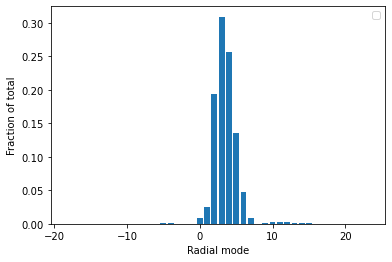

In [50]:
normed=True
if normed:
    plt.bar(results[:, 2], results[:, 3]/ np.sum(results[:, 3]))
else:
    plt.bar(results[:, 2], results[:, 3])


# plt.axvline(x=2, color='C3', label='Predicted radial max')
plt.legend()
plt.xlabel('Radial mode')
plt.ylabel('Fraction of total')
plt.show()